In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam


In [4]:
train_df = pd.read_csv('../data/train_df.csv', index_col=0)
train_df.head()

,file,patient_id,lesion_id,gender,age,site,diagnosis,ben_mal,target,gen_enc,site_enc,diag_enc
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0,1,0,8
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0,0,6,8
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0,0,1,5
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0,0,0,8
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0,0,6,8


In [7]:
train = pd.read_csv('../data/train.csv', index_col=0)
train.head()

,file,target
0,ISIC_1569119,1
1,ISIC_7536704,1
2,ISIC_3696488,1
3,ISIC_3343475,1
4,ISIC_7785723,1


In [14]:
train_2 = train.merge(train_df, how='left', on='file')
train_2 = train_2.drop(columns=['target_x'], axis=1)
train_2 = train_2.rename(columns={'target_y': 'target'})
train_2.head()

,file,patient_id,lesion_id,gender,age,site,diagnosis,ben_mal,target,gen_enc,site_enc,diag_enc
0,ISIC_1569119,IP_6120178,IL_3157235,male,65.0,torso,melanoma,malignant,1,1,4,4
1,ISIC_7536704,IP_3994607,IL_1685088,male,75.0,torso,melanoma,malignant,1,1,4,4
2,ISIC_3696488,IP_6051587,IL_8878499,female,90.0,upper extremity,melanoma,malignant,1,0,6,4
3,ISIC_3343475,IP_4576785,IL_9262145,male,80.0,head/neck,melanoma,malignant,1,1,0,4
4,ISIC_7785723,IP_8447624,IL_2711936,female,50.0,lower extremity,melanoma,malignant,1,0,1,4


In [15]:
train_2.to_csv('../data/train_2.csv')

In [6]:
val = pd.read_csv('../data/val.csv', index_col=0)
val.head()

,file,target
0,ISIC_6767569,1
1,ISIC_7312977,1
2,ISIC_1785627,1
3,ISIC_8066110,1
4,ISIC_8838753,1


In [12]:
val_2 = val.merge(train_df, how='left', on='file')
val_2 = val_2.drop(columns=['target_x'], axis=1)
val_2 = val_2.rename(columns={'target_y': 'target'})
val_2.head()

,file,patient_id,lesion_id,gender,age,site,diagnosis,ben_mal,target,gen_enc,site_enc,diag_enc
0,ISIC_6767569,IP_7665112,IL_1769376,male,70.0,head/neck,melanoma,malignant,1,1,0,4
1,ISIC_7312977,IP_8675890,IL_2723500,male,55.0,lower extremity,melanoma,malignant,1,1,1,4
2,ISIC_1785627,IP_0170821,IL_6029631,female,40.0,upper extremity,melanoma,malignant,1,0,6,4
3,ISIC_8066110,IP_3055814,IL_7066374,male,50.0,lower extremity,melanoma,malignant,1,1,1,4
4,ISIC_8838753,IP_6292815,IL_9486623,female,65.0,lower extremity,melanoma,malignant,1,0,1,4


In [17]:
val_2.to_csv('../data/val_2.csv')

In [10]:
test = pd.read_csv('../data/test_df.csv', index_col=0)
test.head()

,file,age,site,lesion_id,gender,target,jpg
0,ISIC_0000000,55.0,anterior torso,NaN,female,0,ISIC_0000000.jpg
1,ISIC_0000001,30.0,anterior torso,NaN,female,0,ISIC_0000001.jpg
2,ISIC_0000002,60.0,upper extremity,NaN,female,1,ISIC_0000002.jpg
3,ISIC_0000003,30.0,upper extremity,NaN,male,0,ISIC_0000003.jpg
4,ISIC_0000004,80.0,posterior torso,NaN,male,1,ISIC_0000004.jpg


# ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   zoom_range = 0.1, 
                                   horizontal_flip = True,
                                   vertical_flip = True)

In [33]:
train_folder = '../split/train'
val_folder = '../split/val'

In [35]:
train_generator = train_datagen.flow_from_directory(train_folder, 
                                                    target_size=(256, 256), 
                                                    batch_size = 32,
                                                    class_mode='binary')

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       target_size=(256, 256),
                                                                       batch_size = 32,
                                                                       class_mode='binary')


Found 32135 images belonging to 2 classes.
Found 6626 images belonging to 2 classes.


In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics = ['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')])

In [41]:
history_2 = model.fit(train_generator, 
                      epochs = 5,
                      steps_per_epoch = 20,
                      validation_data = val_generator,
                      validation_steps = 20)

Epoch 1/5
20/20 [==============================] - 374s 19s/step - loss: 0.4847 - accuracy: 0.8188 - precision_1: 0.8188 - recall_1: 1.0000 - auc_2: 0.4786 - auc_3: 0.8066 - val_loss: 0.2660 - val_accuracy: 0.9797 - val_precision_1: 0.9797 - val_recall_1: 1.0000 - val_auc_2: 0.5000 - val_auc_3: 0.9797
Epoch 2/5
20/20 [==============================] - 350s 18s/step - loss: 0.5101 - accuracy: 0.7953 - precision_1: 0.7953 - recall_1: 1.0000 - auc_2: 0.4818 - auc_3: 0.7872 - val_loss: 0.2304 - val_accuracy: 0.9828 - val_precision_1: 0.9828 - val_recall_1: 1.0000 - val_auc_2: 0.5000 - val_auc_3: 0.9828
Epoch 3/5
20/20 [==============================] - 489s 25s/step - loss: 0.5057 - accuracy: 0.7984 - precision_1: 0.7984 - recall_1: 1.0000 - auc_2: 0.4838 - auc_3: 0.7905 - val_loss: 0.2114 - val_accuracy: 0.9828 - val_precision_1: 0.9828 - val_recall_1: 1.0000 - val_auc_2: 0.5000 - val_auc_3: 0.9828
Epoch 4/5
20/20 [==============================] - 459s 24s/step - loss: 0.5028 - accuracy:

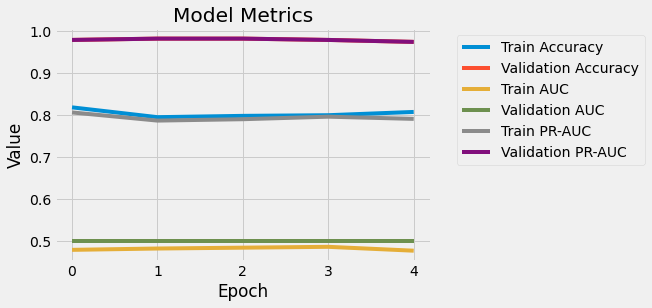

In [42]:
plt.style.use('fivethirtyeight')
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_2.history['auc_2'])
plt.plot(history_2.history['val_auc_2'])
plt.plot(history_2.history['auc_3'])
plt.plot(history_2.history['val_auc_3'])
plt.title('Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train AUC', 'Validation AUC', 'Train PR-AUC', 'Validation PR-AUC'], loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
test_x, test_y = next(test_generator)

In [ ]:
results_test = model.evaluate(test_x, test_y)

In [ ]:
results_test

# Albumentations

In [ ]:
transform = A.Compose([
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightness(limit=0.2, p=0.75),
    A.RandomContrast(limit=0.2, p=0.75),
    A.OneOf([
        A.MotionBlur(blur_limit=5),
        A.MedianBlur(blur_limit=5),
        A.GaussianBlur(blue_limit=5),
        A.GaussNoise(var_limit(5.0, 30.0)),
    ], p=0.7),
    A.OneOf([
        A.OpticalDistortion(distort_limit=1.0),
        A.GridDistortion(num_steps=5, distort_limit=1.),
        A.ElasticTransform(alpha=3),
    ], p=0.7),
    A.CLAHE(clip_limit=4.0, p=0.7),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
    A.Resize(image_size, image_size),
    A.Cutout(max_h_size=int(image_size*0.375), max_w_size=int(image_size*0.375), num_holes=1, p=0.7),
    A.Normalize()
])